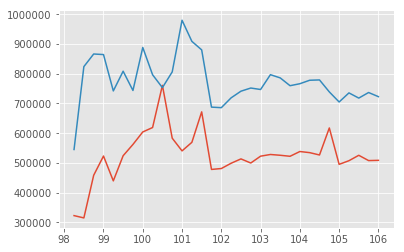

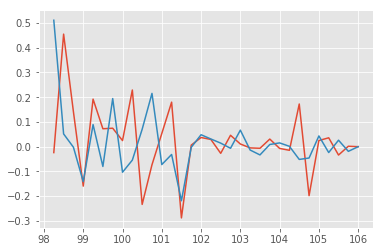

單價(元/平方公尺)
鄉鎮市區 Season               
蛋白區  98.25    97632.142857
     98.50    95289.880952
     98.75   138658.444444
     99.00   158223.297297
     99.25   132980.888000
     99.50   158546.817391
     99.75   170038.247826
     100.00  182726.125424
     100.25  187236.345238
     100.50  230136.931034
     100.75  176392.529412
     101.00  163471.737226
     101.25  172171.072581
     101.50  203164.133106
     101.75  144617.894691
     102.00  145524.054423
     102.25  150909.785345
     102.50  155318.928344
     102.75  151134.806800
     103.00  158098.043221
     103.25  159809.441919
     103.50  159014.590193
     103.75  157986.188037
     104.00  162835.947212
     104.25  161682.889297
     104.50  159306.323665
     104.75  186793.085607
     105.00  149774.456468
     105.25  153488.782022
     105.50  158994.176976
...                    ...
蛋黃區  98.75   262038.160000
     99.00   261442.780488
     99.25   224468.647059
     99.50   244508.500000
     99.75   224929.843750
     100.00  268693.395349
     100.25  240903.194444
     100.50  227805.060606
     100.75  243831.524390
     101.00  296366.250000
     101.25  274893.123596
     101.50  266217.888489
     101.75  207983.604223
     102.00  207435.149074
     102.25  217447.254677
     102.50  224200.068696
     102.75  227409.601075
     103.00  225921.844178
     103.25  241002.470430
     103.50  237716.144028
     103.75  229777.017045
     104.00  231800.030705
     104.25  235323.068238
     104.50  235655.564608
     104.75  223479.109321
     105.00  213220.016832
     105.25  222466.114428
     105.50  217177.041054
     105.75  222852.689699
     106.00  218627.605479

[64 rows x 1 columns]

In [1]:
#0. Initial definitions

import pandas as pd
import matplotlib.pyplot as plt

Transaction_object = ['房地(土地+建物)','房地(土地+建物)+車位']
Area_dict = {'中山區':'蛋黃區','中正區':'蛋黃區','大安區':'蛋黃區','信義區':'蛋黃區','松山區':'蛋黃區',\
             '士林區':'蛋白區','內湖區':'蛋白區','南港區':'蛋白區','文山區':'蛋白區','萬華區':'蛋白區',\
             '大同區':'蛋白區','北投區':'蛋白區'}
#read files
df0 = pd.read_excel("17s1.xls", sheetname = '不動產買賣')
df1 = pd.read_excel("16s4.xls", sheetname = '不動產買賣')
df2 = pd.read_excel("16s3.xls", sheetname = '不動產買賣')
df3 = pd.read_excel("16s2.xls", sheetname = '不動產買賣')
df4 = pd.read_excel("16s1.xls", sheetname = '不動產買賣')
df5 = pd.read_excel("15s4.xls", sheetname = '不動產買賣')
df6 = pd.read_excel("15s3.xls", sheetname = '不動產買賣')
df7 = pd.read_excel("15s2.xls", sheetname = '不動產買賣')
df8 = pd.read_excel("15s1.xls", sheetname = '不動產買賣')
df9 = pd.read_excel("14s4.xls", sheetname = '不動產買賣')
df10 = pd.read_excel("14s3.xls", sheetname = '不動產買賣')
df11 = pd.read_excel("14s2.xls", sheetname = '不動產買賣')
df12 = pd.read_excel("14s1.xls", sheetname = '不動產買賣')
df13 = pd.read_excel("13s4.xls", sheetname = '不動產買賣')
df14 = pd.read_excel("13s3.xls", sheetname = '不動產買賣')
df15 = pd.read_excel("13s2.xls", sheetname = '不動產買賣')
df16 = pd.read_excel("13s1.xls", sheetname = '不動產買賣')
df17 = pd.read_excel("12s4.xls", sheetname = '不動產買賣')
Total_input = 18
df_list = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17]

#classify seasons
bins = [980101,980401,980701,981001,\
        990101,990401,990701,991001,\
        1000101,1000401,1000701,1001001,\
        1010101,1010401,1010701,1011001,\
        1020101,1020401,1020701,1021001,\
        1030101,1030401,1030701,1031001,\
        1040101,1040401,1040701,1041001,\
        1050101,1050401,1050701,1051001,\
        1060101]

#Year and Season
labels = [98.25,98.50,98.75,99.00,\
          99.25,99.50,99.75,100.00,\
          100.25,100.50,100.75,101.00,\
          101.25,101.50,101.75,102.00,\
          102.25,102.50,102.75,103.00,\
          103.25,103.50,103.75,104.00,\
          104.25,104.50,104.75,105.00,\
          105.25,105.50,105.75,106.00]

#for plot
plot_len = len(labels)
x_label = range(0,len(labels))

#1. Concatenate all input dataframes
df_all = pd.DataFrame()
for i in range(0,Total_input):
    df_temp = df_list[i][[0,1,7,22]]  #Only keep "district", "transaction object", "transaction date", "unit price"
    df_all = df_all.append(df_temp,ignore_index=True)

#2. Select specific transaction objects
df_all = df_all[df_all['交易標的'].isin(Transaction_object)] 
    
#3. Convert date from string to integer
df_all['交易年月日'] = df_all['交易年月日'].astype('int')
#df_all = df_all.sort_values(['交易年月日'])

#4. Classify districts to center area and outer area
df_all[['鄉鎮市區']] = df_all[['鄉鎮市區']].replace(Area_dict)

#5. Removing rows which don't have unit price or price is 0
df_all = df_all[df_all['單價(元/平方公尺)'].notnull()]
df_all['單價(元/平方公尺)'] = df_all['單價(元/平方公尺)'].astype('float')
filter = df_all['單價(元/平方公尺)']>30000
df_all = df_all[filter]

#reset index
df_all = df_all.reset_index(drop=True)

#6. Change date to season
df_all['Season'] = pd.cut(df_all['交易年月日'],bins,right=False,labels=labels)
df_all = df_all.drop('交易年月日',axis=1)

#7. Group by season and calculate mean
df_result = df_all.groupby(['鄉鎮市區','Season']).mean()



#8. Change unit to Ping and plot price trends of center area and outer area
all_price = list(df_result.iloc[:,0])
outer_price = all_price[0:plot_len]
center_price = all_price[plot_len:2*plot_len]

for i in range(0,len(outer_price)):
    outer_price[i]=outer_price[i]*3.305785

for i in range(0,len(center_price)):
    center_price[i]=center_price[i]*3.305785
    
plt.style.use('ggplot')
plt.plot(labels,outer_price)
plt.plot(labels,center_price)
plt.show()

#plot slope
outer_slope=[0]*len(outer_price)
for i in range(1,len(outer_price)):
    outer_slope[i-1] = (outer_price[i]-outer_price[i-1])/outer_price[i-1]

center_slope=[0]*len(center_price)
for i in range(1,len(center_price)):
    center_slope[i-1] = (center_price[i]-center_price[i-1])/center_price[i-1]

plt.plot(labels,outer_slope)
plt.plot(labels,center_slope)
plt.show()

#show result in output
df_result

In [2]:
center_price
outer_price


[322750.87337500002,
 315007.85910416668,
 458375.00576777779,
 523052.20285594603,
 439606.22483708005,
 524121.69072991313,
 562109.88908976095,
 604053.28453388135,
 618963.10154291673,
 760783.21455982758,
 583115.77784147055,
 540402.41684656939,
 569160.54917100805,
 671616.94375916384,
 478075.66700120538,
 481071.23625225527,
 498875.30474799068,
 513450.9835366176,
 499619.1772966244,
 522638.13980969746,
 528295.65595483582,
 525668.04703999124,
 522268.37062071817,
 538300.63175533514,
 534488.87019454094,
 526632.45517824299,
 617497.78050258709,
 495122.15157646994,
 507400.91327815736,
 525600.56533442438,
 507800.1397648186,
 508648.44152839913]

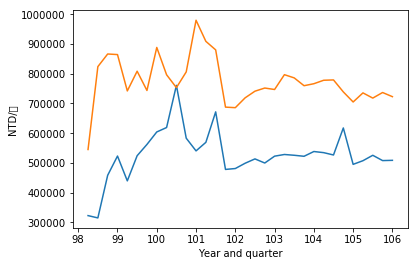

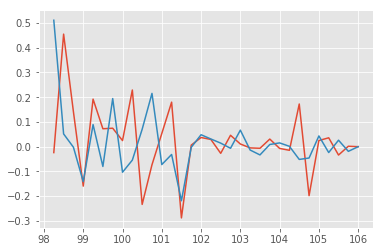

單價(元/平方公尺)
鄉鎮市區 Season               
蛋白區  98.25    97632.142857
     98.50    95289.880952
     98.75   138658.444444
     99.00   158223.297297
     99.25   132980.888000
     99.50   158546.817391
     99.75   170038.247826
     100.00  182726.125424
     100.25  187236.345238
     100.50  230136.931034
     100.75  176392.529412
     101.00  163471.737226
     101.25  172171.072581
     101.50  203164.133106
     101.75  144617.894691
     102.00  145524.054423
     102.25  150909.785345
     102.50  155318.928344
     102.75  151134.806800
     103.00  158098.043221
     103.25  159809.441919
     103.50  159014.590193
     103.75  157986.188037
     104.00  162835.947212
     104.25  161682.889297
     104.50  159306.323665
     104.75  186793.085607
     105.00  149774.456468
     105.25  153488.782022
     105.50  158994.176976
...                    ...
蛋黃區  98.75   262038.160000
     99.00   261442.780488
     99.25   224468.647059
     99.50   244508.500000
     99.75   224929.843750
     100.00  268693.395349
     100.25  240903.194444
     100.50  227805.060606
     100.75  243831.524390
     101.00  296366.250000
     101.25  274893.123596
     101.50  266217.888489
     101.75  207983.604223
     102.00  207435.149074
     102.25  217447.254677
     102.50  224200.068696
     102.75  227409.601075
     103.00  225921.844178
     103.25  241002.470430
     103.50  237716.144028
     103.75  229777.017045
     104.00  231800.030705
     104.25  235323.068238
     104.50  235655.564608
     104.75  223479.109321
     105.00  213220.016832
     105.25  222466.114428
     105.50  217177.041054
     105.75  222852.689699
     106.00  218627.605479

[64 rows x 1 columns]

In [1]:
#0. Initial definitions

import pandas as pd
import matplotlib.pyplot as plt

Transaction_object = ['房地(土地+建物)','房地(土地+建物)+車位']
Area_dict = {'中山區':'蛋黃區','中正區':'蛋黃區','大安區':'蛋黃區','信義區':'蛋黃區','松山區':'蛋黃區',\
             '士林區':'蛋白區','內湖區':'蛋白區','南港區':'蛋白區','文山區':'蛋白區','萬華區':'蛋白區',\
             '大同區':'蛋白區','北投區':'蛋白區'}
#read files
df0 = pd.read_excel("17s1.xls", sheetname = '不動產買賣')
df1 = pd.read_excel("16s4.xls", sheetname = '不動產買賣')
df2 = pd.read_excel("16s3.xls", sheetname = '不動產買賣')
df3 = pd.read_excel("16s2.xls", sheetname = '不動產買賣')
df4 = pd.read_excel("16s1.xls", sheetname = '不動產買賣')
df5 = pd.read_excel("15s4.xls", sheetname = '不動產買賣')
df6 = pd.read_excel("15s3.xls", sheetname = '不動產買賣')
df7 = pd.read_excel("15s2.xls", sheetname = '不動產買賣')
df8 = pd.read_excel("15s1.xls", sheetname = '不動產買賣')
df9 = pd.read_excel("14s4.xls", sheetname = '不動產買賣')
df10 = pd.read_excel("14s3.xls", sheetname = '不動產買賣')
df11 = pd.read_excel("14s2.xls", sheetname = '不動產買賣')
df12 = pd.read_excel("14s1.xls", sheetname = '不動產買賣')
df13 = pd.read_excel("13s4.xls", sheetname = '不動產買賣')
df14 = pd.read_excel("13s3.xls", sheetname = '不動產買賣')
df15 = pd.read_excel("13s2.xls", sheetname = '不動產買賣')
df16 = pd.read_excel("13s1.xls", sheetname = '不動產買賣')
df17 = pd.read_excel("12s4.xls", sheetname = '不動產買賣')
Total_input = 18
df_list = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17]

#classify seasons
bins = [980101,980401,980701,981001,\
        990101,990401,990701,991001,\
        1000101,1000401,1000701,1001001,\
        1010101,1010401,1010701,1011001,\
        1020101,1020401,1020701,1021001,\
        1030101,1030401,1030701,1031001,\
        1040101,1040401,1040701,1041001,\
        1050101,1050401,1050701,1051001,\
        1060101]

#Year and Season
labels = [98.25,98.50,98.75,99.00,\
          99.25,99.50,99.75,100.00,\
          100.25,100.50,100.75,101.00,\
          101.25,101.50,101.75,102.00,\
          102.25,102.50,102.75,103.00,\
          103.25,103.50,103.75,104.00,\
          104.25,104.50,104.75,105.00,\
          105.25,105.50,105.75,106.00]

#for plot
plot_len = len(labels)
x_label = range(0,len(labels))

#1. Concatenate all input dataframes
df_all = pd.DataFrame()
for i in range(0,Total_input):
    df_temp = df_list[i][[0,1,7,22]]  #Only keep "district", "transaction object", "transaction date", "unit price"
    df_all = df_all.append(df_temp,ignore_index=True)

#2. Select specific transaction objects
df_all = df_all[df_all['交易標的'].isin(Transaction_object)] 
    
#3. Convert date from string to integer
df_all['交易年月日'] = df_all['交易年月日'].astype('int')
#df_all = df_all.sort_values(['交易年月日'])

#4. Classify districts to center area and outer area
df_all[['鄉鎮市區']] = df_all[['鄉鎮市區']].replace(Area_dict)

#5. Removing rows which don't have unit price or price is 0
df_all = df_all[df_all['單價(元/平方公尺)'].notnull()]
df_all['單價(元/平方公尺)'] = df_all['單價(元/平方公尺)'].astype('float')
filter = df_all['單價(元/平方公尺)']>30000
df_all = df_all[filter]

#reset index
df_all = df_all.reset_index(drop=True)

#6. Change date to season
df_all['Season'] = pd.cut(df_all['交易年月日'],bins,right=False,labels=labels)
df_all = df_all.drop('交易年月日',axis=1)

#7. Group by season and calculate mean
df_result = df_all.groupby(['鄉鎮市區','Season']).mean()



#8. Change unit to Ping and plot price trends of center area and outer area
all_price = list(df_result.iloc[:,0])
outer_price = all_price[0:plot_len]
center_price = all_price[plot_len:2*plot_len]

for i in range(0,len(outer_price)):
    outer_price[i]=outer_price[i]*3.305785

for i in range(0,len(center_price)):
    center_price[i]=center_price[i]*3.305785
    
plt.xlabel('Year and quarter')
plt.ylabel('NTD/Ping')
plt.style.use('ggplot')
plt.plot(labels,outer_price)
plt.plot(labels,center_price)
plt.show()

#plot slope
outer_slope=[0]*len(outer_price)
for i in range(1,len(outer_price)):
    outer_slope[i-1] = (outer_price[i]-outer_price[i-1])/outer_price[i-1]

center_slope=[0]*len(center_price)
for i in range(1,len(center_price)):
    center_slope[i-1] = (center_price[i]-center_price[i-1])/center_price[i-1]

plt.xlabel('Year and quarter')
plt.ylabel('QoQ growth')
plt.plot(labels,outer_slope)
plt.plot(labels,center_slope)
plt.show()

#show result in output
df_result

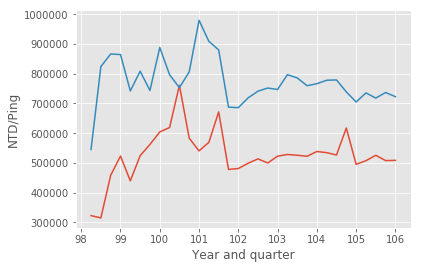

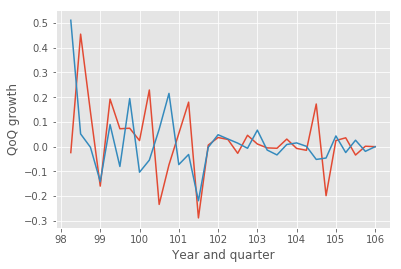

單價(元/平方公尺)
鄉鎮市區 Season               
蛋白區  98.25    97632.142857
     98.50    95289.880952
     98.75   138658.444444
     99.00   158223.297297
     99.25   132980.888000
     99.50   158546.817391
     99.75   170038.247826
     100.00  182726.125424
     100.25  187236.345238
     100.50  230136.931034
     100.75  176392.529412
     101.00  163471.737226
     101.25  172171.072581
     101.50  203164.133106
     101.75  144617.894691
     102.00  145524.054423
     102.25  150909.785345
     102.50  155318.928344
     102.75  151134.806800
     103.00  158098.043221
     103.25  159809.441919
     103.50  159014.590193
     103.75  157986.188037
     104.00  162835.947212
     104.25  161682.889297
     104.50  159306.323665
     104.75  186793.085607
     105.00  149774.456468
     105.25  153488.782022
     105.50  158994.176976
...                    ...
蛋黃區  98.75   262038.160000
     99.00   261442.780488
     99.25   224468.647059
     99.50   244508.500000
     99.75   224929.843750
     100.00  268693.395349
     100.25  240903.194444
     100.50  227805.060606
     100.75  243831.524390
     101.00  296366.250000
     101.25  274893.123596
     101.50  266217.888489
     101.75  207983.604223
     102.00  207435.149074
     102.25  217447.254677
     102.50  224200.068696
     102.75  227409.601075
     103.00  225921.844178
     103.25  241002.470430
     103.50  237716.144028
     103.75  229777.017045
     104.00  231800.030705
     104.25  235323.068238
     104.50  235655.564608
     104.75  223479.109321
     105.00  213220.016832
     105.25  222466.114428
     105.50  217177.041054
     105.75  222852.689699
     106.00  218627.605479

[64 rows x 1 columns]

In [2]:
#0. Initial definitions

import pandas as pd
import matplotlib.pyplot as plt

Transaction_object = ['房地(土地+建物)','房地(土地+建物)+車位']
Area_dict = {'中山區':'蛋黃區','中正區':'蛋黃區','大安區':'蛋黃區','信義區':'蛋黃區','松山區':'蛋黃區',\
             '士林區':'蛋白區','內湖區':'蛋白區','南港區':'蛋白區','文山區':'蛋白區','萬華區':'蛋白區',\
             '大同區':'蛋白區','北投區':'蛋白區'}
#read files
df0 = pd.read_excel("17s1.xls", sheetname = '不動產買賣')
df1 = pd.read_excel("16s4.xls", sheetname = '不動產買賣')
df2 = pd.read_excel("16s3.xls", sheetname = '不動產買賣')
df3 = pd.read_excel("16s2.xls", sheetname = '不動產買賣')
df4 = pd.read_excel("16s1.xls", sheetname = '不動產買賣')
df5 = pd.read_excel("15s4.xls", sheetname = '不動產買賣')
df6 = pd.read_excel("15s3.xls", sheetname = '不動產買賣')
df7 = pd.read_excel("15s2.xls", sheetname = '不動產買賣')
df8 = pd.read_excel("15s1.xls", sheetname = '不動產買賣')
df9 = pd.read_excel("14s4.xls", sheetname = '不動產買賣')
df10 = pd.read_excel("14s3.xls", sheetname = '不動產買賣')
df11 = pd.read_excel("14s2.xls", sheetname = '不動產買賣')
df12 = pd.read_excel("14s1.xls", sheetname = '不動產買賣')
df13 = pd.read_excel("13s4.xls", sheetname = '不動產買賣')
df14 = pd.read_excel("13s3.xls", sheetname = '不動產買賣')
df15 = pd.read_excel("13s2.xls", sheetname = '不動產買賣')
df16 = pd.read_excel("13s1.xls", sheetname = '不動產買賣')
df17 = pd.read_excel("12s4.xls", sheetname = '不動產買賣')
Total_input = 18
df_list = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17]

#classify seasons
bins = [980101,980401,980701,981001,\
        990101,990401,990701,991001,\
        1000101,1000401,1000701,1001001,\
        1010101,1010401,1010701,1011001,\
        1020101,1020401,1020701,1021001,\
        1030101,1030401,1030701,1031001,\
        1040101,1040401,1040701,1041001,\
        1050101,1050401,1050701,1051001,\
        1060101]

#Year and Season
labels = [98.25,98.50,98.75,99.00,\
          99.25,99.50,99.75,100.00,\
          100.25,100.50,100.75,101.00,\
          101.25,101.50,101.75,102.00,\
          102.25,102.50,102.75,103.00,\
          103.25,103.50,103.75,104.00,\
          104.25,104.50,104.75,105.00,\
          105.25,105.50,105.75,106.00]

#for plot
plot_len = len(labels)
x_label = range(0,len(labels))

#1. Concatenate all input dataframes
df_all = pd.DataFrame()
for i in range(0,Total_input):
    df_temp = df_list[i][[0,1,7,22]]  #Only keep "district", "transaction object", "transaction date", "unit price"
    df_all = df_all.append(df_temp,ignore_index=True)

#2. Select specific transaction objects
df_all = df_all[df_all['交易標的'].isin(Transaction_object)] 
    
#3. Convert date from string to integer
df_all['交易年月日'] = df_all['交易年月日'].astype('int')
#df_all = df_all.sort_values(['交易年月日'])

#4. Classify districts to center area and outer area
df_all[['鄉鎮市區']] = df_all[['鄉鎮市區']].replace(Area_dict)

#5. Removing rows which don't have unit price or price is 0
df_all = df_all[df_all['單價(元/平方公尺)'].notnull()]
df_all['單價(元/平方公尺)'] = df_all['單價(元/平方公尺)'].astype('float')
filter = df_all['單價(元/平方公尺)']>30000
df_all = df_all[filter]

#reset index
df_all = df_all.reset_index(drop=True)

#6. Change date to season
df_all['Season'] = pd.cut(df_all['交易年月日'],bins,right=False,labels=labels)
df_all = df_all.drop('交易年月日',axis=1)

#7. Group by season and calculate mean
df_result = df_all.groupby(['鄉鎮市區','Season']).mean()



#8. Change unit to Ping and plot price trends of center area and outer area
all_price = list(df_result.iloc[:,0])
outer_price = all_price[0:plot_len]
center_price = all_price[plot_len:2*plot_len]

for i in range(0,len(outer_price)):
    outer_price[i]=outer_price[i]*3.305785

for i in range(0,len(center_price)):
    center_price[i]=center_price[i]*3.305785
    
plt.xlabel('Year and quarter')
plt.ylabel('NTD/Ping')
plt.style.use('ggplot')
plt.plot(labels,outer_price)
plt.plot(labels,center_price)
plt.show()

#plot slope
outer_slope=[0]*len(outer_price)
for i in range(1,len(outer_price)):
    outer_slope[i-1] = (outer_price[i]-outer_price[i-1])/outer_price[i-1]

center_slope=[0]*len(center_price)
for i in range(1,len(center_price)):
    center_slope[i-1] = (center_price[i]-center_price[i-1])/center_price[i-1]

plt.xlabel('Year and quarter')
plt.ylabel('QoQ growth')
matplotlib.pyplot.bar (labels, outer_slope)
matplotlib.pyplot.bar (labels, center_slope)
#plt.plot(labels,outer_slope)
#plt.plot(labels,center_slope)
plt.show()

#show result in output
df_result

In [3]:
center_slope


[0.5113146307502846,
 0.051565690156873234,
 -0.00227210995602743,
 -0.14142342488859055,
 0.089276846471680701,
 -0.080073519938979626,
 0.19456534032664211,
 -0.10342718274974158,
 -0.054370942936601253,
 0.070351658306211082,
 0.21545501854664262,
 -0.072454695514399592,
 -0.031558574448236169,
 -0.21874669879107239,
 -0.0026370114641411659,
 0.048266196195097019,
 0.031054951826283424,
 0.014315483474610922,
 -0.0065421903447988455,
 0.066751518901988452,
 -0.013636069357046565,
 -0.033397508676187779,
 0.0088042472029518058,
 0.01519860684408695,
 0.0014129357248107747,
 -0.051670561259120278,
 -0.045906270701479311,
 0.043364116243767507,
 -0.023774737053962682,
 0.026133741475764454,
 -0.018959090085676086,
 0]

In [4]:
len(center_slope)

32

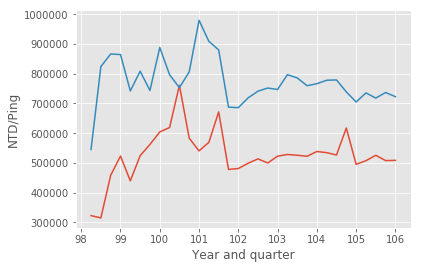

NameError: name 'matplotlib' is not defined

In [5]:
#0. Initial definitions

import pandas as pd
import matplotlib.pyplot as plt

Transaction_object = ['房地(土地+建物)','房地(土地+建物)+車位']
Area_dict = {'中山區':'蛋黃區','中正區':'蛋黃區','大安區':'蛋黃區','信義區':'蛋黃區','松山區':'蛋黃區',\
             '士林區':'蛋白區','內湖區':'蛋白區','南港區':'蛋白區','文山區':'蛋白區','萬華區':'蛋白區',\
             '大同區':'蛋白區','北投區':'蛋白區'}
#read files
df0 = pd.read_excel("17s1.xls", sheetname = '不動產買賣')
df1 = pd.read_excel("16s4.xls", sheetname = '不動產買賣')
df2 = pd.read_excel("16s3.xls", sheetname = '不動產買賣')
df3 = pd.read_excel("16s2.xls", sheetname = '不動產買賣')
df4 = pd.read_excel("16s1.xls", sheetname = '不動產買賣')
df5 = pd.read_excel("15s4.xls", sheetname = '不動產買賣')
df6 = pd.read_excel("15s3.xls", sheetname = '不動產買賣')
df7 = pd.read_excel("15s2.xls", sheetname = '不動產買賣')
df8 = pd.read_excel("15s1.xls", sheetname = '不動產買賣')
df9 = pd.read_excel("14s4.xls", sheetname = '不動產買賣')
df10 = pd.read_excel("14s3.xls", sheetname = '不動產買賣')
df11 = pd.read_excel("14s2.xls", sheetname = '不動產買賣')
df12 = pd.read_excel("14s1.xls", sheetname = '不動產買賣')
df13 = pd.read_excel("13s4.xls", sheetname = '不動產買賣')
df14 = pd.read_excel("13s3.xls", sheetname = '不動產買賣')
df15 = pd.read_excel("13s2.xls", sheetname = '不動產買賣')
df16 = pd.read_excel("13s1.xls", sheetname = '不動產買賣')
df17 = pd.read_excel("12s4.xls", sheetname = '不動產買賣')
Total_input = 18
df_list = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17]

#classify seasons
bins = [980101,980401,980701,981001,\
        990101,990401,990701,991001,\
        1000101,1000401,1000701,1001001,\
        1010101,1010401,1010701,1011001,\
        1020101,1020401,1020701,1021001,\
        1030101,1030401,1030701,1031001,\
        1040101,1040401,1040701,1041001,\
        1050101,1050401,1050701,1051001,\
        1060101]

#Year and Season
labels = [98.25,98.50,98.75,99.00,\
          99.25,99.50,99.75,100.00,\
          100.25,100.50,100.75,101.00,\
          101.25,101.50,101.75,102.00,\
          102.25,102.50,102.75,103.00,\
          103.25,103.50,103.75,104.00,\
          104.25,104.50,104.75,105.00,\
          105.25,105.50,105.75,106.00]

#for plot
plot_len = len(labels)
x_label = range(0,len(labels))

#1. Concatenate all input dataframes
df_all = pd.DataFrame()
for i in range(0,Total_input):
    df_temp = df_list[i][[0,1,7,22]]  #Only keep "district", "transaction object", "transaction date", "unit price"
    df_all = df_all.append(df_temp,ignore_index=True)

#2. Select specific transaction objects
df_all = df_all[df_all['交易標的'].isin(Transaction_object)] 
    
#3. Convert date from string to integer
df_all['交易年月日'] = df_all['交易年月日'].astype('int')
#df_all = df_all.sort_values(['交易年月日'])

#4. Classify districts to center area and outer area
df_all[['鄉鎮市區']] = df_all[['鄉鎮市區']].replace(Area_dict)

#5. Removing rows which don't have unit price or price is 0
df_all = df_all[df_all['單價(元/平方公尺)'].notnull()]
df_all['單價(元/平方公尺)'] = df_all['單價(元/平方公尺)'].astype('float')
filter = df_all['單價(元/平方公尺)']>30000
df_all = df_all[filter]

#reset index
df_all = df_all.reset_index(drop=True)

#6. Change date to season
df_all['Season'] = pd.cut(df_all['交易年月日'],bins,right=False,labels=labels)
df_all = df_all.drop('交易年月日',axis=1)

#7. Group by season and calculate mean
df_result = df_all.groupby(['鄉鎮市區','Season']).mean()



#8. Change unit to Ping and plot price trends of center area and outer area
all_price = list(df_result.iloc[:,0])
outer_price = all_price[0:plot_len]
center_price = all_price[plot_len:2*plot_len]

for i in range(0,len(outer_price)):
    outer_price[i]=outer_price[i]*3.305785

for i in range(0,len(center_price)):
    center_price[i]=center_price[i]*3.305785
    
plt.xlabel('Year and quarter')
plt.ylabel('NTD/Ping')
plt.style.use('ggplot')
plt.plot(labels,outer_price)
plt.plot(labels,center_price)
plt.show()

#plot slope
outer_slope=[0]*len(outer_price)
for i in range(1,len(outer_price)):
    outer_slope[i-1] = (outer_price[i]-outer_price[i-1])/outer_price[i-1]

center_slope=[0]*len(center_price)
for i in range(1,len(center_price)):
    center_slope[i-1] = (center_price[i]-center_price[i-1])/center_price[i-1]

plt.xlabel('Year and quarter')
plt.ylabel('QoQ growth')
plt.pyplot.bar (labels, outer_slope)
plt.pyplot.bar (labels, center_slope)
#plt.plot(labels,outer_slope)
#plt.plot(labels,center_slope)
plt.show()

#show result in output
df_result

In [6]:
plt.xlabel('Year and quarter')
plt.ylabel('QoQ growth')
plt.pyplot.bar (labels, outer_slope)
plt.pyplot.bar (labels, center_slope)

AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

In [7]:
plt.xlabel('Year and quarter')
plt.ylabel('QoQ growth')
plt.bar (labels, outer_slope)
plt.bar (labels, center_slope)

<Container object of 32 artists>

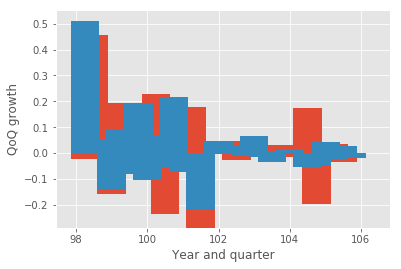

In [8]:
plt.show()

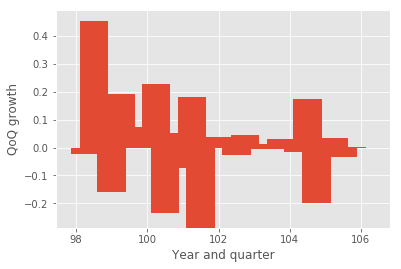

In [9]:
plt.xlabel('Year and quarter')
plt.ylabel('QoQ growth')
plt.bar (labels, outer_slope)
plt.show()